# **1. Data Collection**

**1.1 Importing File formats**

In [1]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/kaggle/input/most-used-beauty-cosmetics-products-in-the-world/most_used_beauty_cosmetics_products_extended.csv')

**1.21 Checking Data Types**

In [2]:
data_types = df.dtypes
print(data_types)

Product_Name          object
Brand                 object
Category              object
Usage_Frequency       object
Price_USD            float64
Rating               float64
Number_of_Reviews      int64
Product_Size          object
Skin_Type             object
Gender_Target         object
Packaging_Type        object
Main_Ingredient       object
Cruelty_Free            bool
Country_of_Origin     object
dtype: object


**1.22 Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# **2. Data Exploration**

**2.1 Understanding the Structure**

**2.11 View the First Few Rows**

In [4]:
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


**2.12 View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


**2.13 Summary Statistics**

In [6]:
df.describe()

,Price_USD,Rating,Number_of_Reviews
count,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333
std,40.402983,1.168029,2855.665464
min,10.000000,1.000000,52.000000
25%,45.480000,2.000000,2562.000000
50%,80.040000,3.000000,5002.000000
75%,114.760000,4.000000,7497.000000
max,149.990000,5.000000,10000.000000


**2.14 View Column Names**

In [7]:
df.columns

Index(['Product_Name', 'Brand', 'Category', 'Usage_Frequency', 'Price_USD',
       'Rating', 'Number_of_Reviews', 'Product_Size', 'Skin_Type',
       'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free',
       'Country_of_Origin'],
      dtype='object')

**2.15 Shape of the Data**

In [8]:
df.shape

(15000, 14)

**2.16 View a Desired Sample of 5 Rows**

In [9]:
df.sample(5)

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
12509,Perfect Contour,Pat McGrath Labs,Makeup Remover,Weekly,12.74,2.1,3913,100ml,Dry,Male,Bottle,Salicylic Acid,True,France
7884,Divine Eye Shadow,Anastasia Beverly Hills,Face Mask,Occasional,24.45,1.8,5745,150ml,Oily,Female,Tube,Aloe Vera,True,Italy
10088,Super Face Oil,Ilia Beauty,Blush,Occasional,146.53,3.8,5135,250ml,Oily,Unisex,Bottle,Glycerin,True,Italy
14274,Ultra Mascara,Hourglass,Foundation,Occasional,63.31,5.0,2685,150ml,Normal,Unisex,Compact,Aloe Vera,True,Italy
6966,Divine Lipstick,Bobby Brown,Face Oil,Weekly,16.90,2.7,2158,100ml,Combination,Unisex,Stick,Glycerin,False,Japan


**2.2 Missing Values**

**2.21 Identifying Missing Values**

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Product_Name         0
Brand                0
Category             0
Usage_Frequency      0
Price_USD            0
Rating               0
Number_of_Reviews    0
Product_Size         0
Skin_Type            0
Gender_Target        0
Packaging_Type       0
Main_Ingredient      0
Cruelty_Free         0
Country_of_Origin    0
dtype: int64


**2.22 Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned_rows = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# **3. Data Cleaning**

**3.1 Identifying Outliers using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of each value in the numeric columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f"Number of rows with outliers: {df_outliers.shape[0]}")

Number of rows with outliers: 0


**3.2 Remove Outliers**

In [13]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **Detailed Analysis**

**What is the typical price range of beauty products, and are there any extreme prices?**

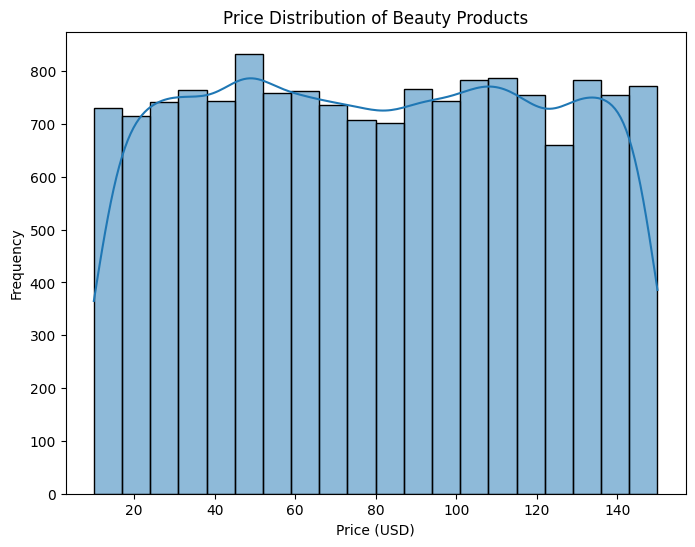

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 6))
sns.histplot(df['Price_USD'], bins=20, kde=True)
plt.title('Price Distribution of Beauty Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

**Are most beauty products highly rated?**

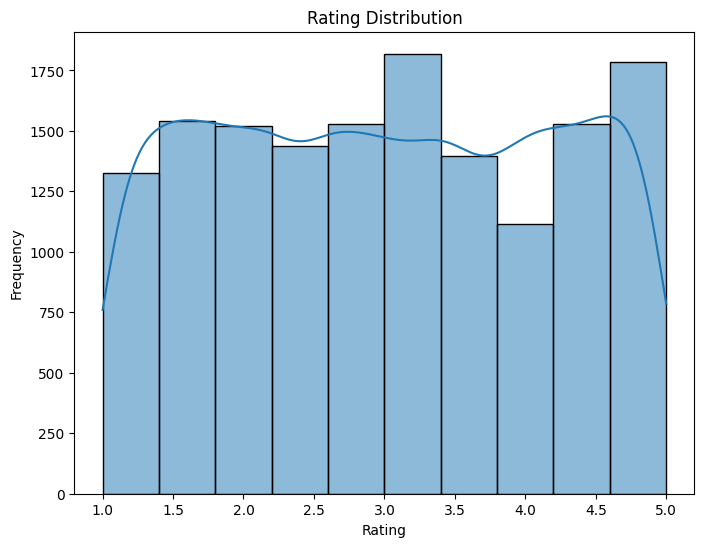

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Do higher-priced beauty products have better ratings?**

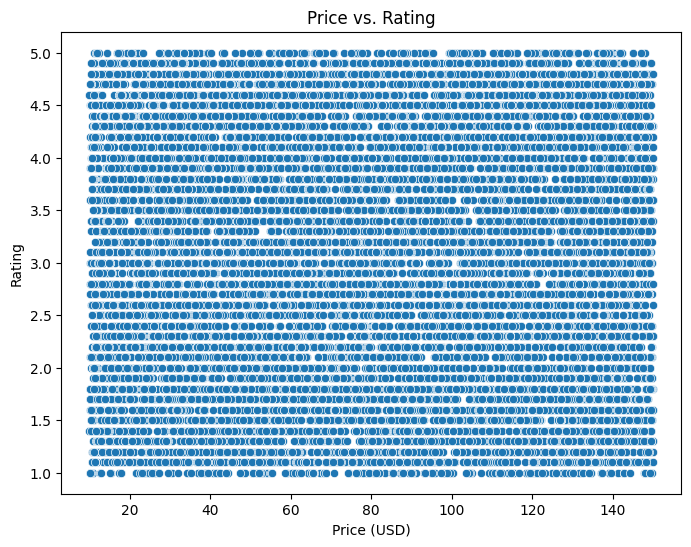

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price_USD', y='Rating', data=df)
plt.title('Price vs. Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.show()

**Which beauty brands are the most popular?**

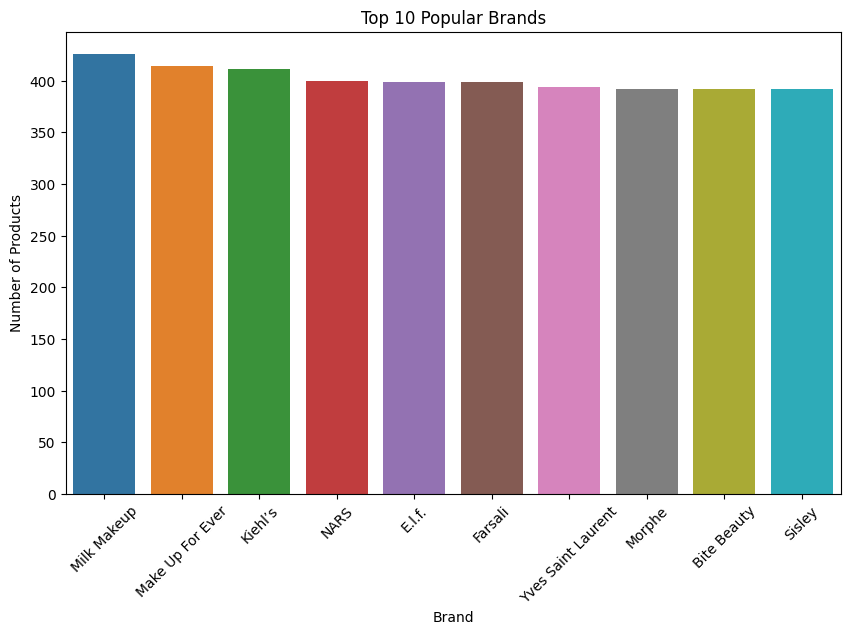

In [17]:
top_brands = df['Brand'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Popular Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

**Which category of beauty products has the most variety?**

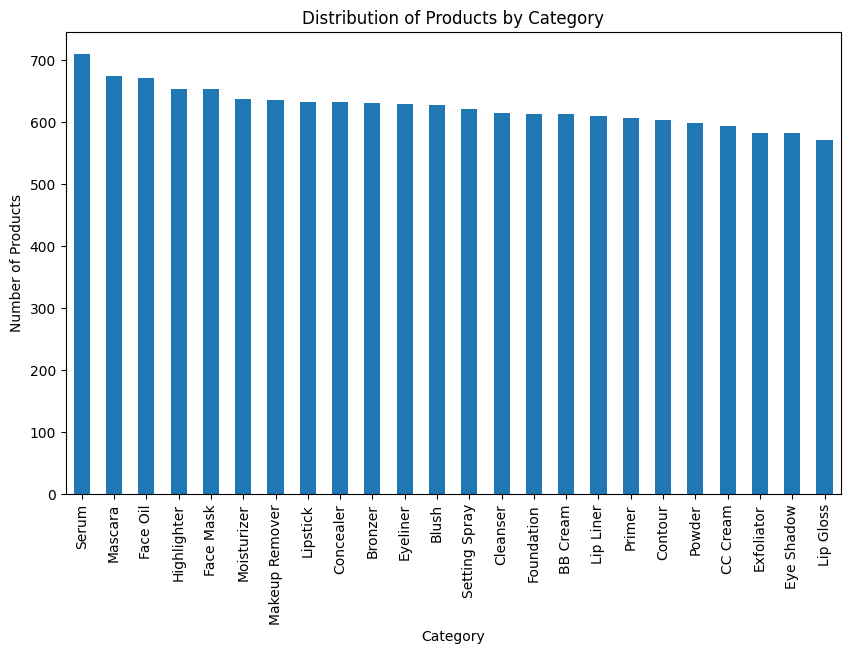

In [18]:
category_distribution = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

**What is the proportion of beauty products targeting different genders?**

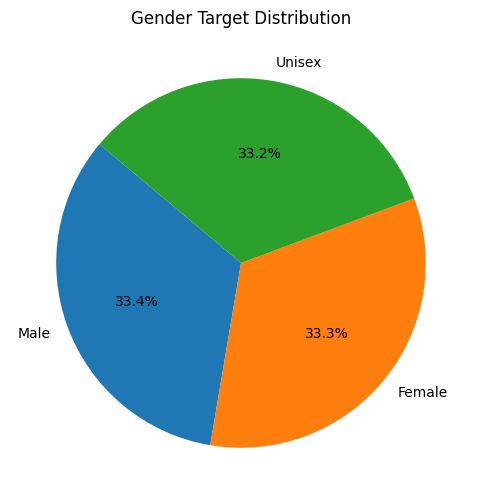

In [19]:
gender_counts = df['Gender_Target'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Target Distribution')
plt.ylabel('')
plt.show()

**Which countries are the leading producers of beauty products?**

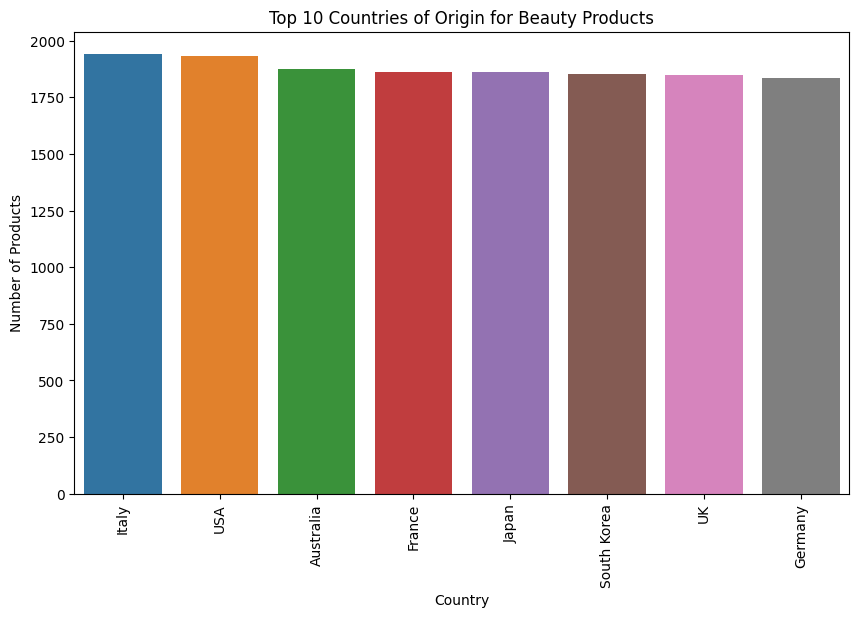

In [20]:
country_counts = df['Country_of_Origin'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries of Origin for Beauty Products')
plt.xlabel('Country')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

**What is the distribution of product sizes in the dataset?**

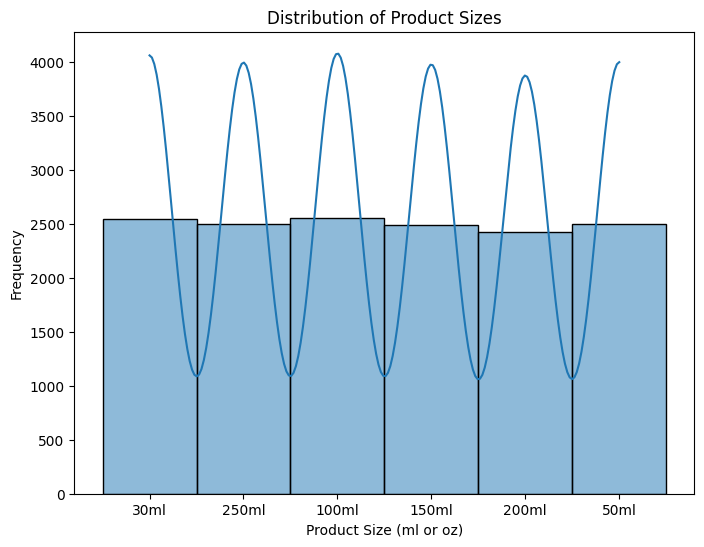

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Product_Size'], bins=20, kde=True)
plt.title('Distribution of Product Sizes')
plt.xlabel('Product Size (ml or oz)')
plt.ylabel('Frequency')
plt.show()

**What are the most common main ingredients used in beauty products?**

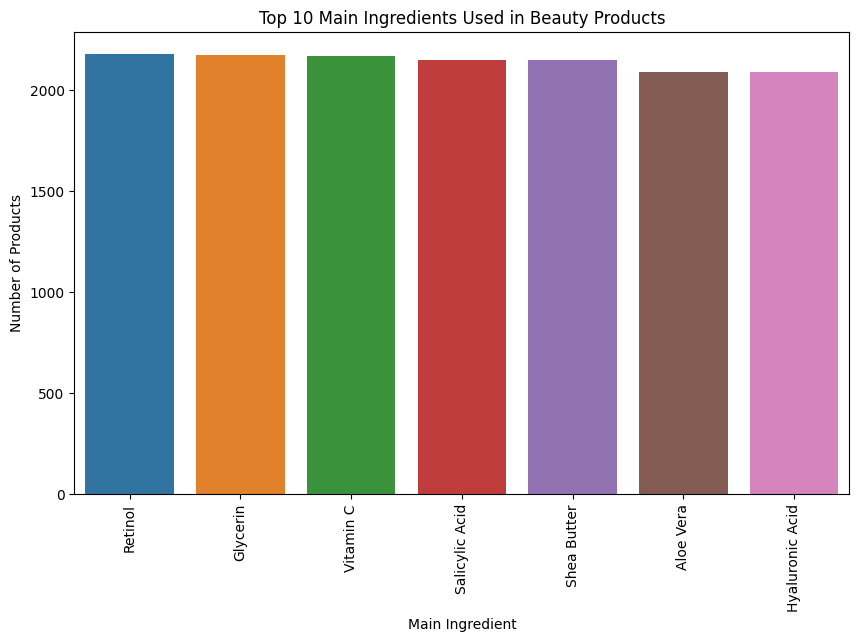

In [22]:
main_ingredients = df['Main_Ingredient'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=main_ingredients.index, y=main_ingredients.values)
plt.title('Top 10 Main Ingredients Used in Beauty Products')
plt.xlabel('Main Ingredient')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

**What are the most common packaging types for beauty products?**

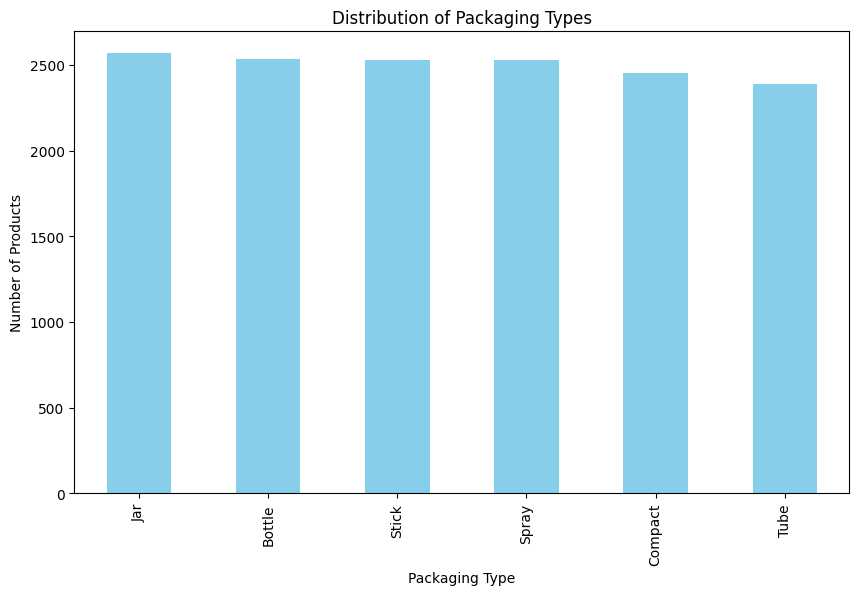

In [23]:
packaging_type_counts = df['Packaging_Type'].value_counts()

plt.figure(figsize=(10, 6))
packaging_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Packaging Types')
plt.xlabel('Packaging Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

**How frequently are beauty products used by consumers?**

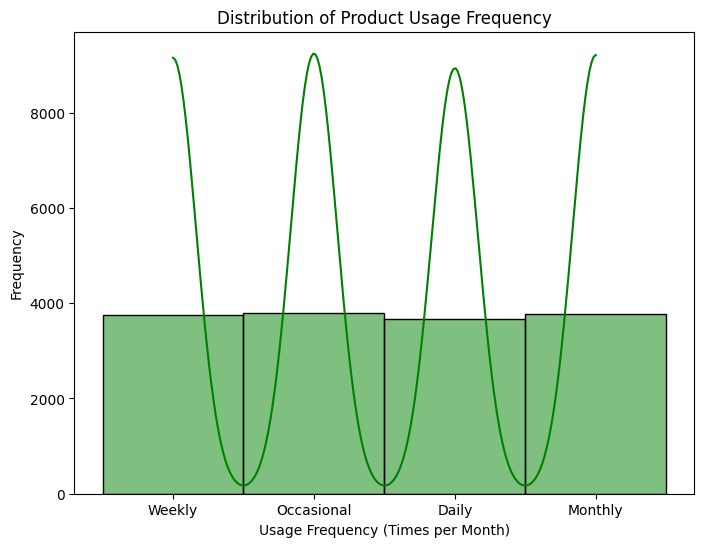

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Usage_Frequency'], bins=20, kde=True, color='green')
plt.title('Distribution of Product Usage Frequency')
plt.xlabel('Usage Frequency (Times per Month)')
plt.ylabel('Frequency')
plt.show()

**Which beauty products have received the most customer reviews?**

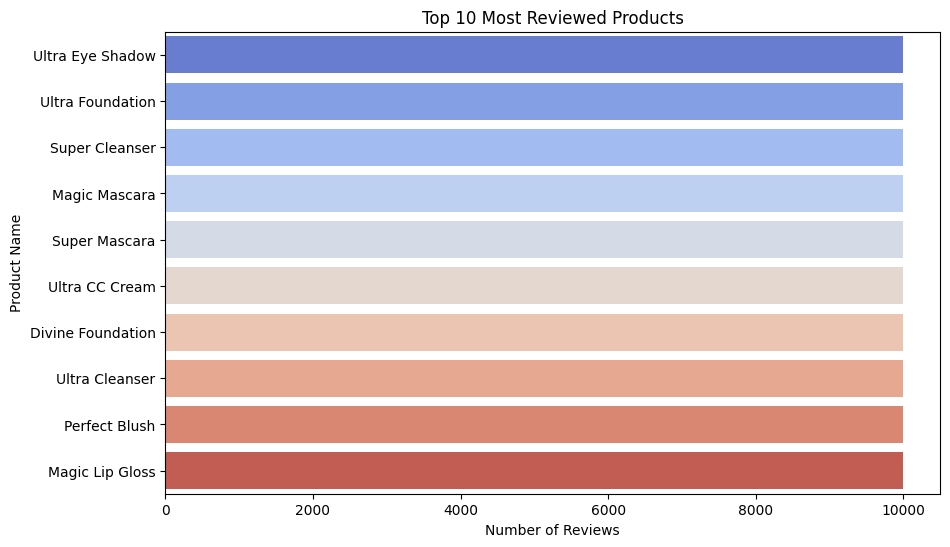

In [25]:
top_reviews = df[['Product_Name', 'Number_of_Reviews']].sort_values(by='Number_of_Reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_Reviews', y='Product_Name', data=top_reviews, palette='coolwarm')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

**Which product categories tend to have higher or lower average ratings?**

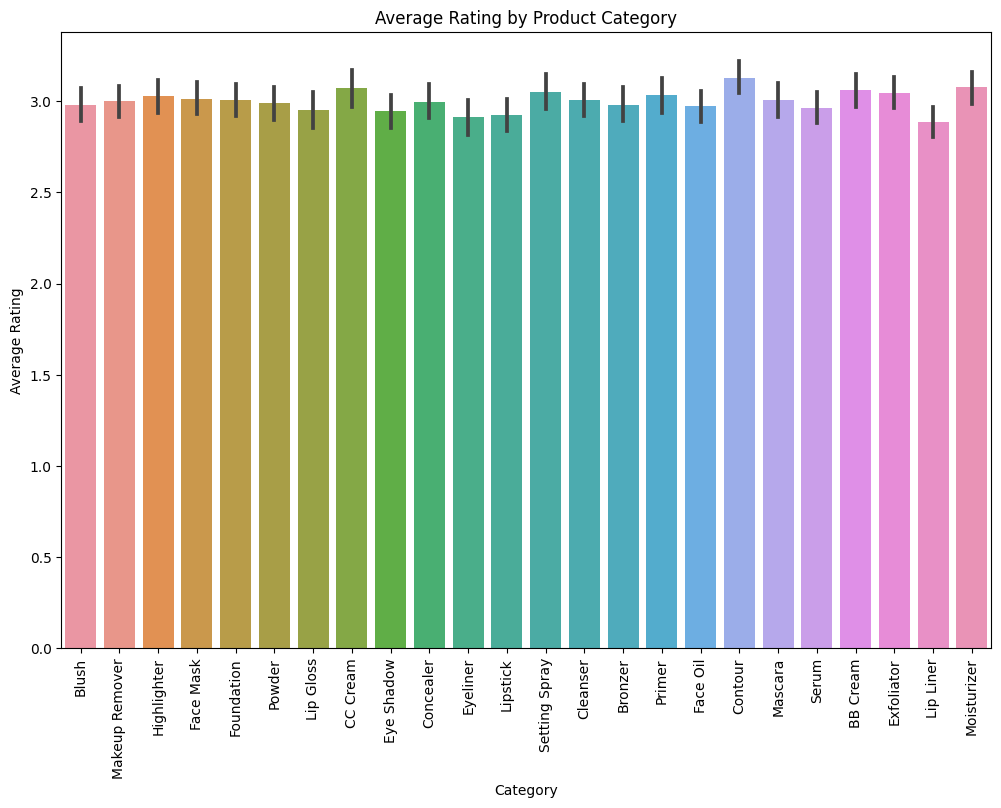

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Rating', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Average Rating by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Which countries tend to produce more expensive beauty products?**

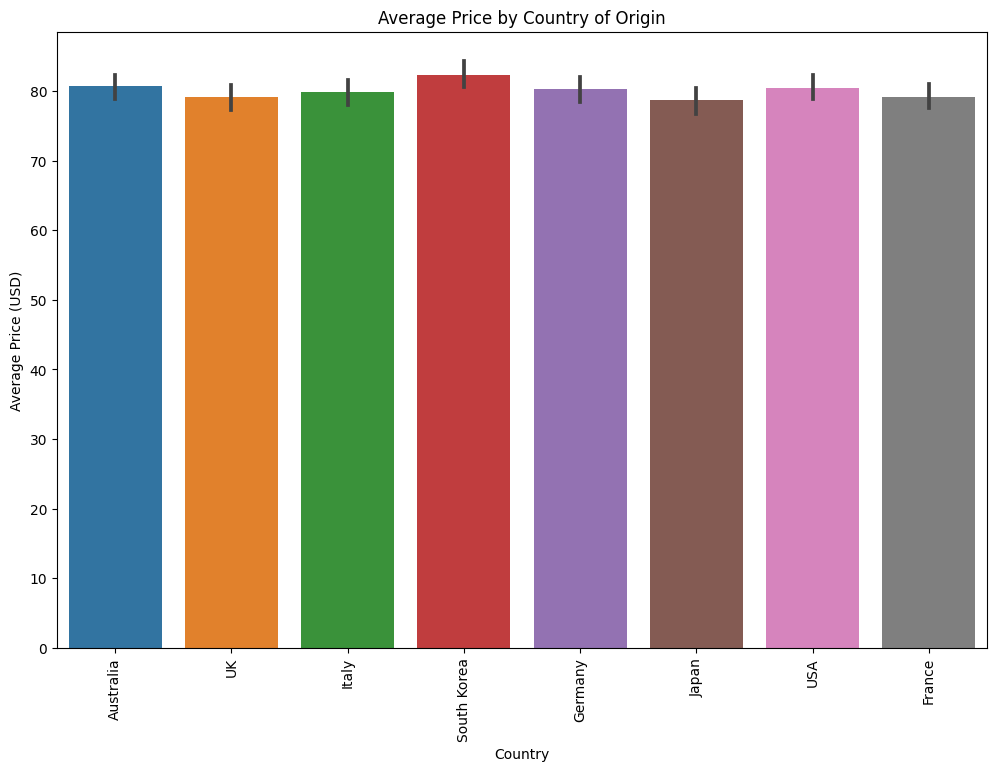

In [27]:
top_countries = df['Country_of_Origin'].value_counts().nlargest(10).index
df_top_countries = df[df['Country_of_Origin'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Country_of_Origin', y='Price_USD', data=df_top_countries, estimator=lambda x: sum(x)/len(x))
plt.title('Average Price by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.show()


**What is the proportion of beauty products designed for different skin types?**

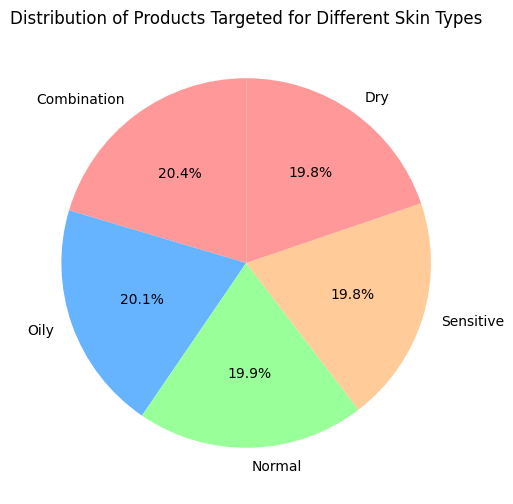

In [28]:
skin_type_counts = df['Skin_Type'].value_counts()

plt.figure(figsize=(8, 6))
skin_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Products Targeted for Different Skin Types')
plt.ylabel('')
plt.show()

**What is the correlation between numerical variables such as price, rating, and number of reviews?**

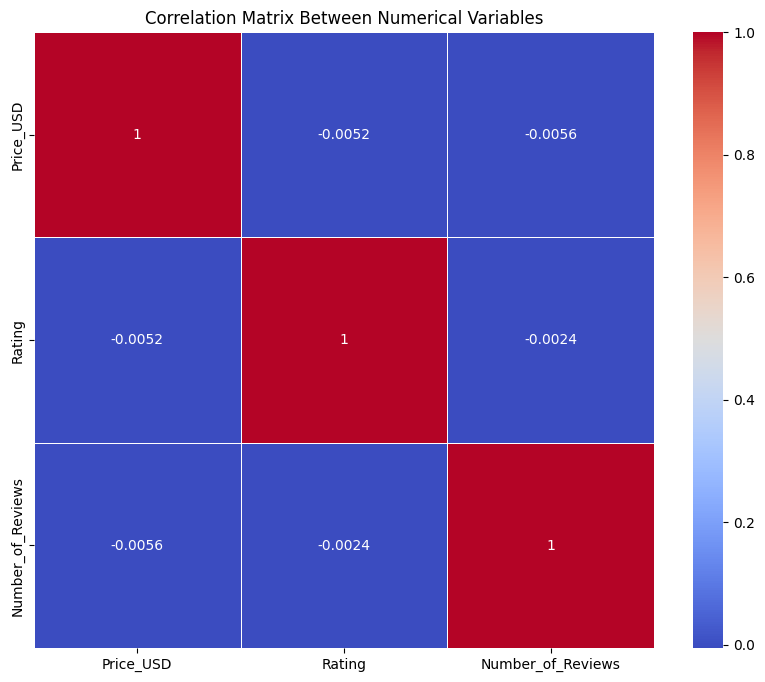

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
corr = numerical_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Numerical Variables')
plt.show()

**Do more expensive beauty products tend to receive more reviews?**

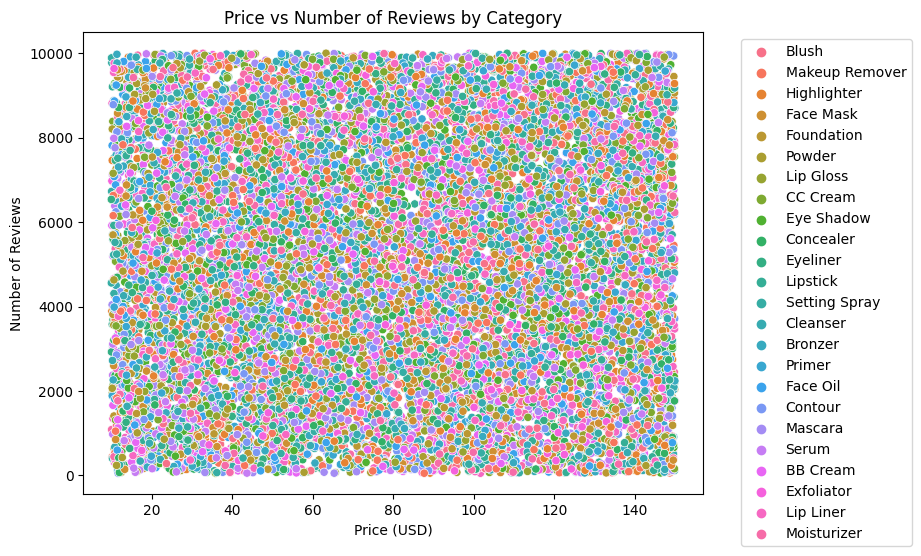

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price_USD', y='Number_of_Reviews', data=df, hue='Category')
plt.title('Price vs Number of Reviews by Category')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Does the type of packaging influence the number of reviews a product receives?**

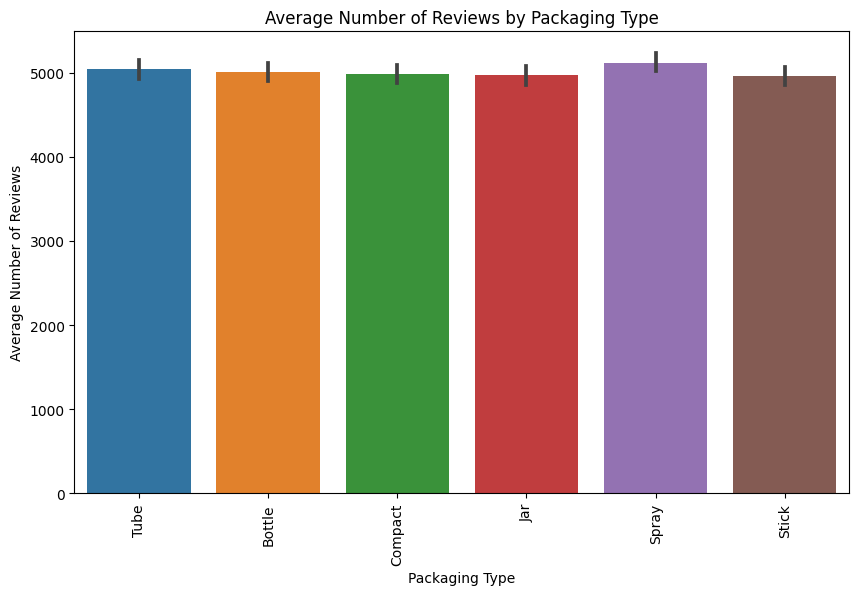

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Packaging_Type', y='Number_of_Reviews', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Average Number of Reviews by Packaging Type')
plt.xlabel('Packaging Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=90)
plt.show()

**How do product categories differ based on the gender target (e.g., male, female, unisex)?**

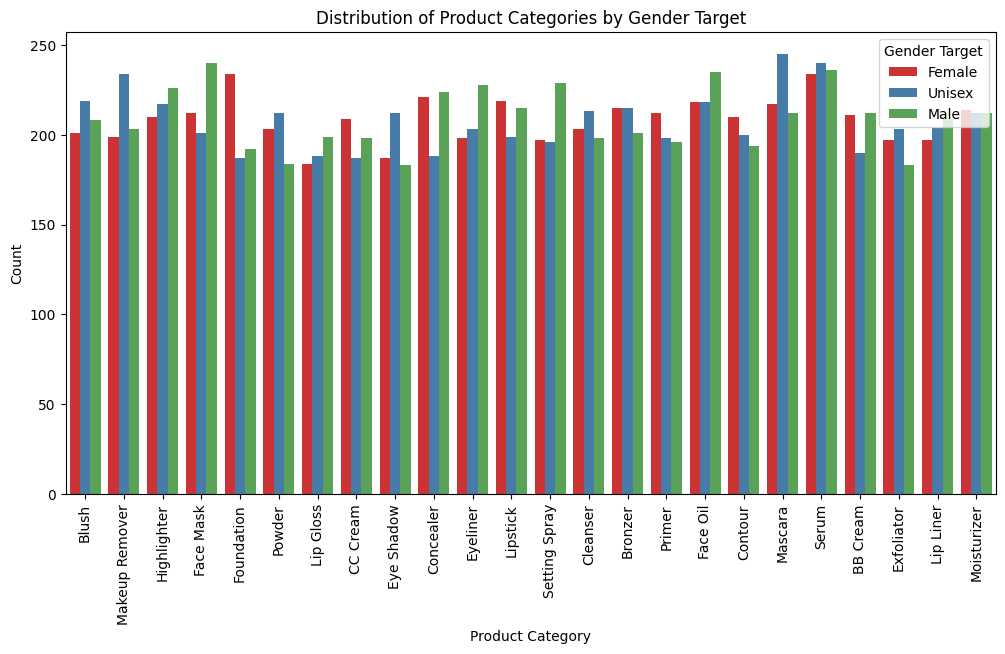

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Gender_Target', data=df, palette='Set1')
plt.title('Distribution of Product Categories by Gender Target')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender Target')
plt.show()

**Which countries produce the most cruelty-free beauty products?**

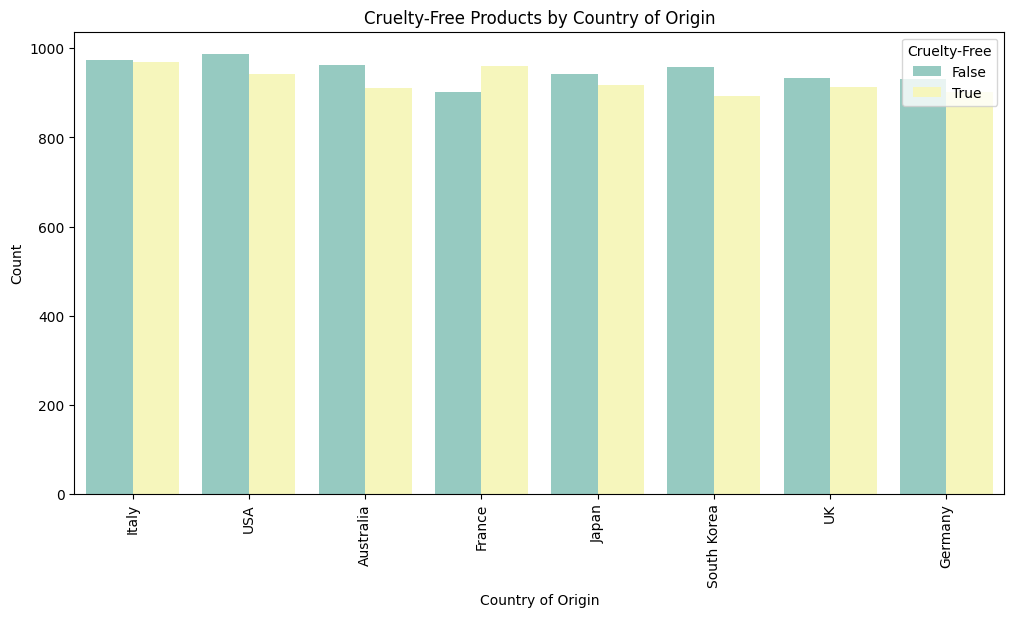

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country_of_Origin', hue='Cruelty_Free', data=df, order=df['Country_of_Origin'].value_counts().index[:10], palette='Set3')
plt.title('Cruelty-Free Products by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cruelty-Free')
plt.show()

**Is there any visible relationship between the price of a beauty product and its rating? Does it vary by category?**

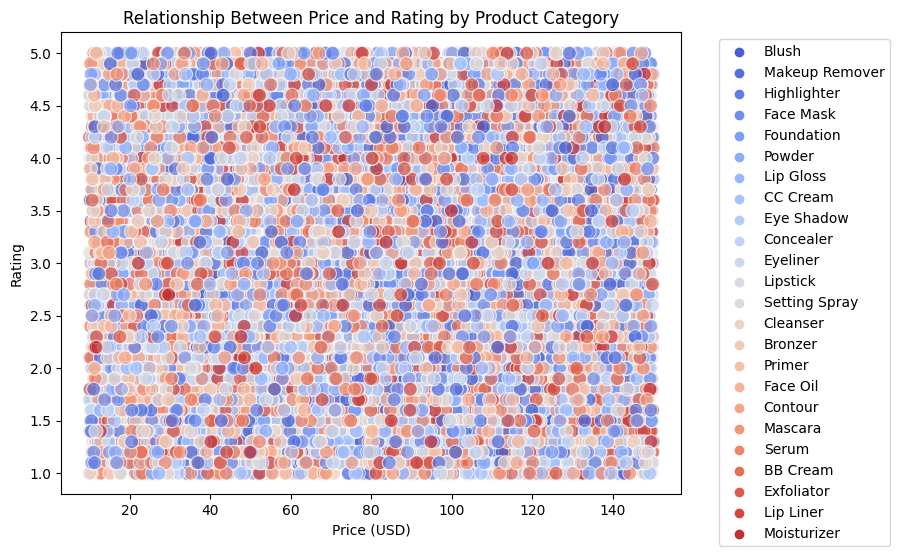

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price_USD', y='Rating', data=df, hue='Category', palette='coolwarm', s=100, alpha=0.7)
plt.title('Relationship Between Price and Rating by Product Category')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**How are reviews distributed for beauty products targeting different skin types?**

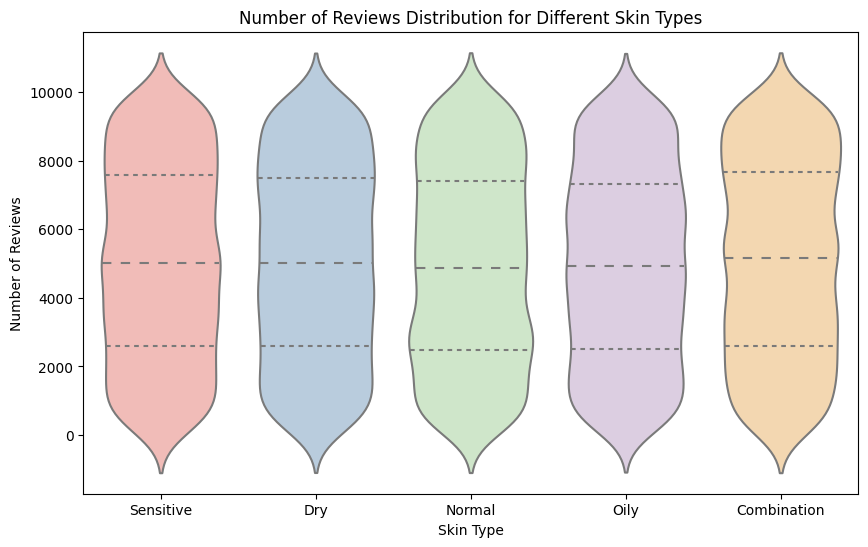

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Skin_Type', y='Number_of_Reviews', data=df, inner='quartile', palette='Pastel1')
plt.title('Number of Reviews Distribution for Different Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Number of Reviews')
plt.show()

**What is the price range for the most popular beauty brands?**

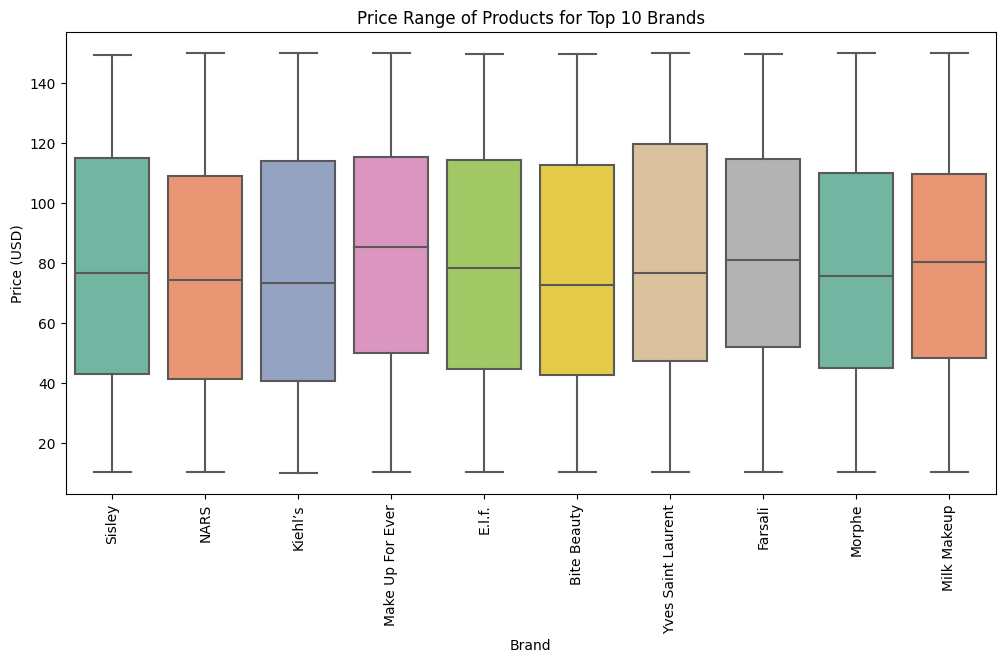

In [36]:
top_brands = df['Brand'].value_counts().nlargest(10).index
df_top_brands = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price_USD', data=df_top_brands, palette='Set2')
plt.title('Price Range of Products for Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

**How do ratings vary for products with different main ingredients?**

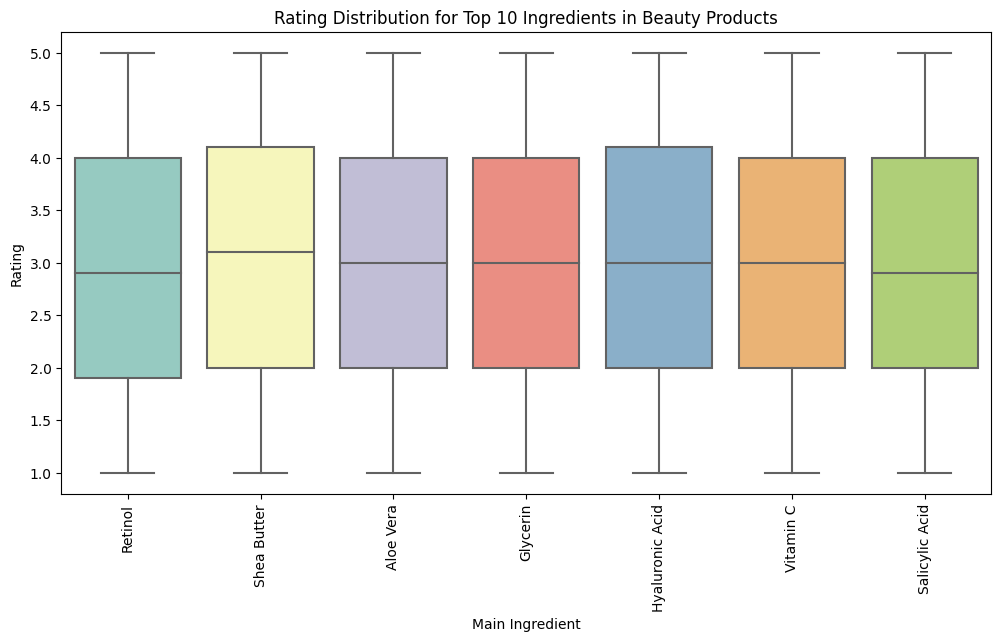

In [37]:
top_ingredients = df['Main_Ingredient'].value_counts().nlargest(10).index
df_top_ingredients = df[df['Main_Ingredient'].isin(top_ingredients)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Main_Ingredient', y='Rating', data=df_top_ingredients, palette='Set3')
plt.title('Rating Distribution for Top 10 Ingredients in Beauty Products')
plt.xlabel('Main Ingredient')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

**Do cruelty-free products tend to be more expensive or higher-rated compared to non-cruelty-free products?**

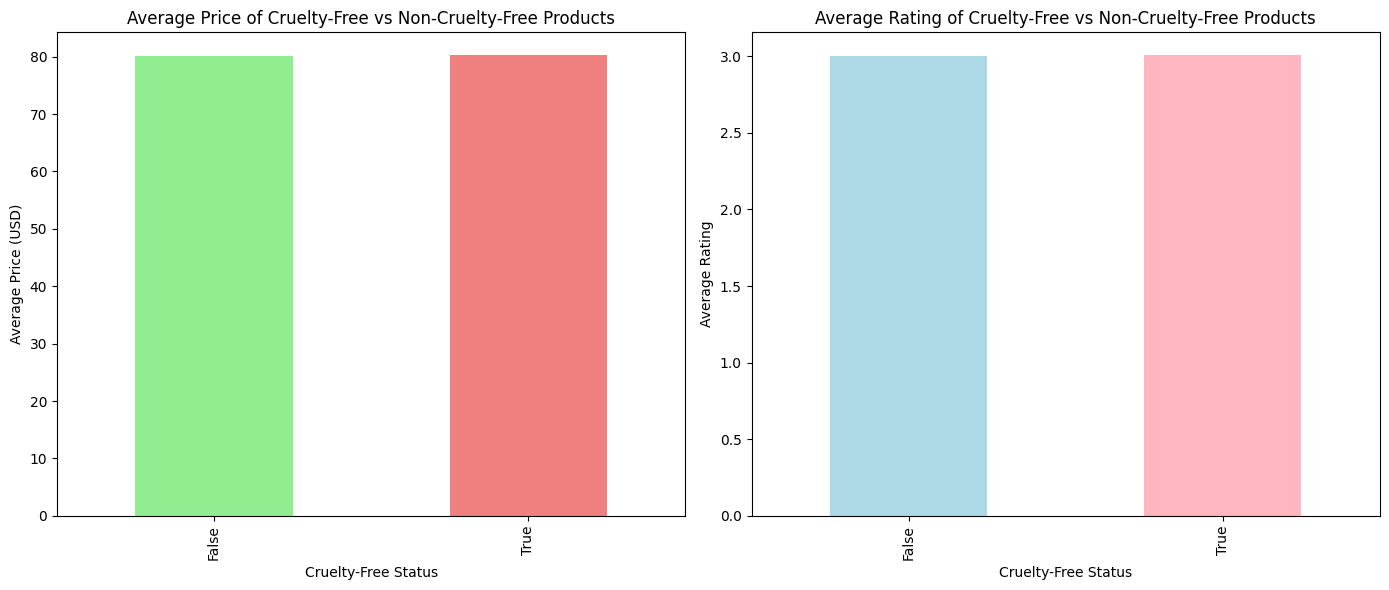

In [38]:
cruelty_free_prices = df.groupby('Cruelty_Free')['Price_USD'].mean()
cruelty_free_ratings = df.groupby('Cruelty_Free')['Rating'].mean()

plt.figure(figsize=(14, 6))

# Plotting average price
plt.subplot(1, 2, 1)
cruelty_free_prices.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Average Price of Cruelty-Free vs Non-Cruelty-Free Products')
plt.xlabel('Cruelty-Free Status')
plt.ylabel('Average Price (USD)')

# Plotting average rating
plt.subplot(1, 2, 2)
cruelty_free_ratings.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Average Rating of Cruelty-Free vs Non-Cruelty-Free Products')
plt.xlabel('Cruelty-Free Status')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

**How are reviews distributed across different beauty products?**

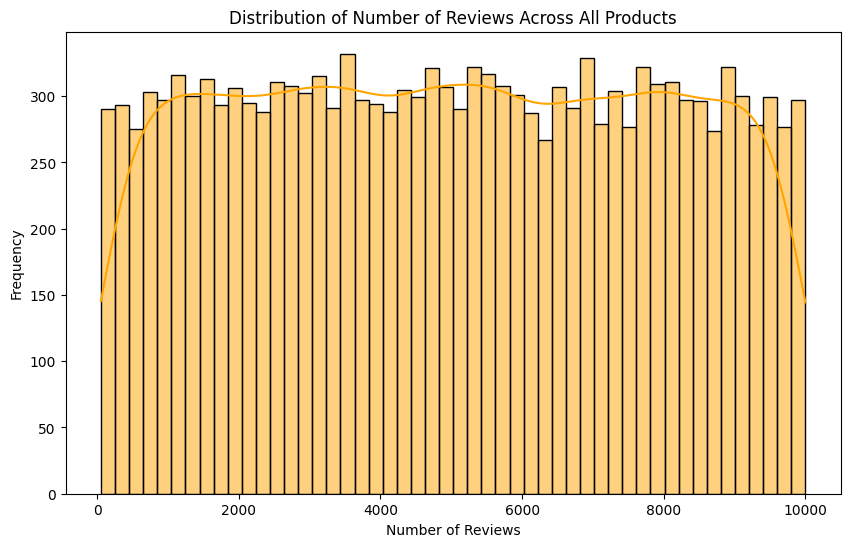

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Reviews'], bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Reviews Across All Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

**How do product ratings differ based on price categories (e.g., budget, mid-range, premium, luxury)?**

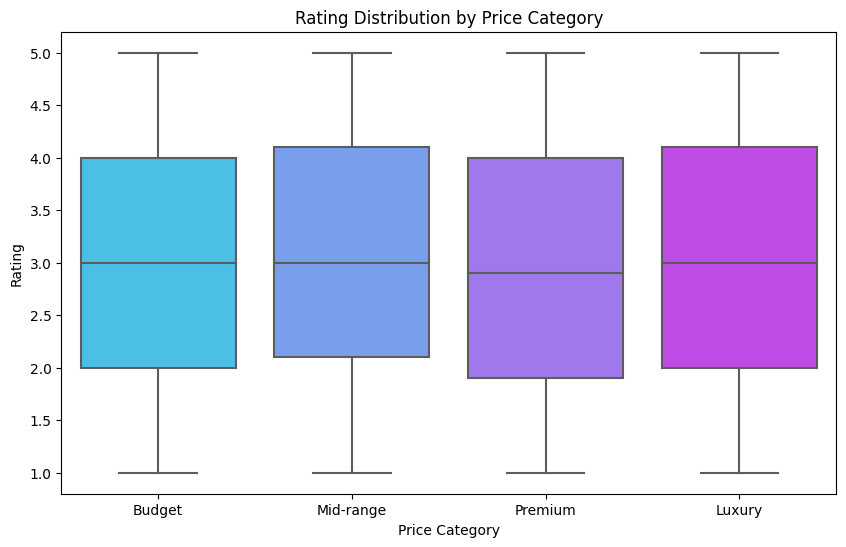

In [40]:
df['Price_Category'] = pd.cut(df['Price_USD'], bins=[0, 20, 50, 100, 500], labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Category', y='Rating', data=df, palette='cool')
plt.title('Rating Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Rating')
plt.show()

**Which skin types have products that tend to receive more reviews?**

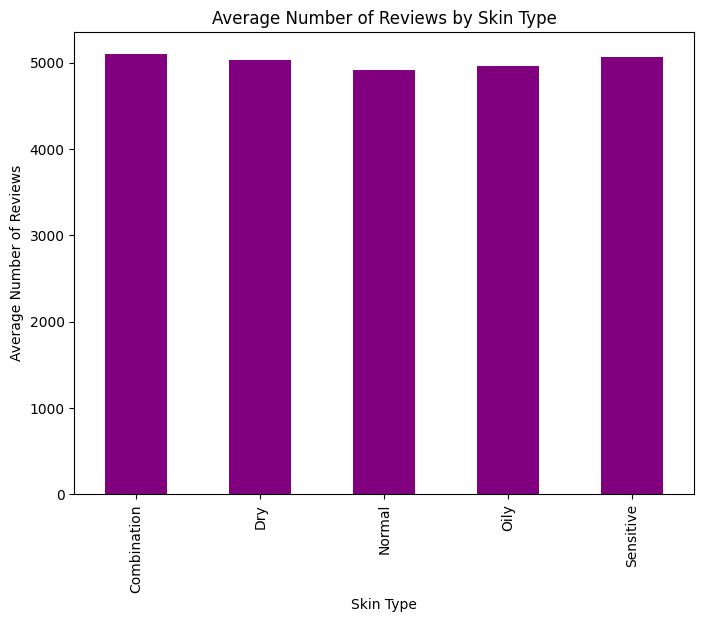

In [41]:
skin_type_reviews = df.groupby('Skin_Type')['Number_of_Reviews'].mean()

plt.figure(figsize=(8, 6))
skin_type_reviews.plot(kind='bar', color='purple')
plt.title('Average Number of Reviews by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Average Number of Reviews')
plt.show()

**Is there a relationship between the number of reviews and the rating a product receives?**

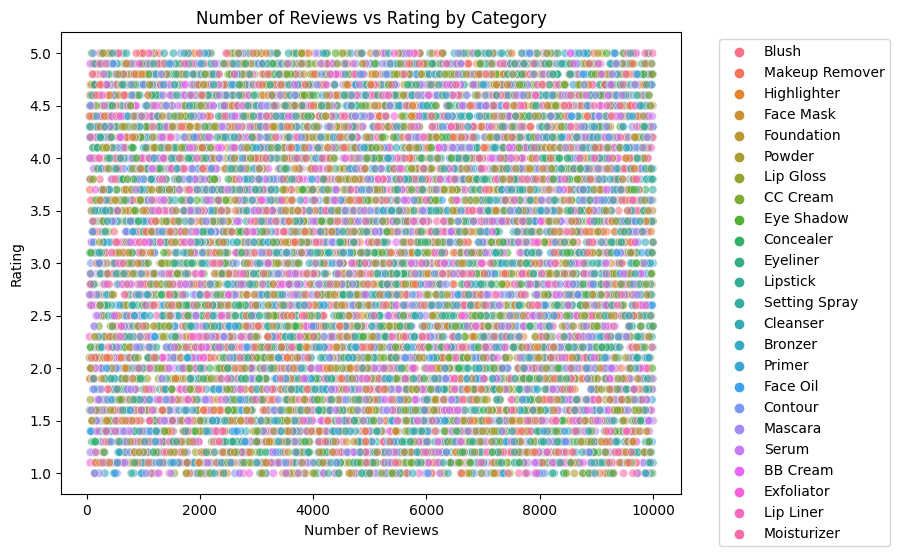

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number_of_Reviews', y='Rating', data=df, hue='Category', alpha=0.6)
plt.title('Number of Reviews vs Rating by Category')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Which countries have the most beauty products in the dataset?**

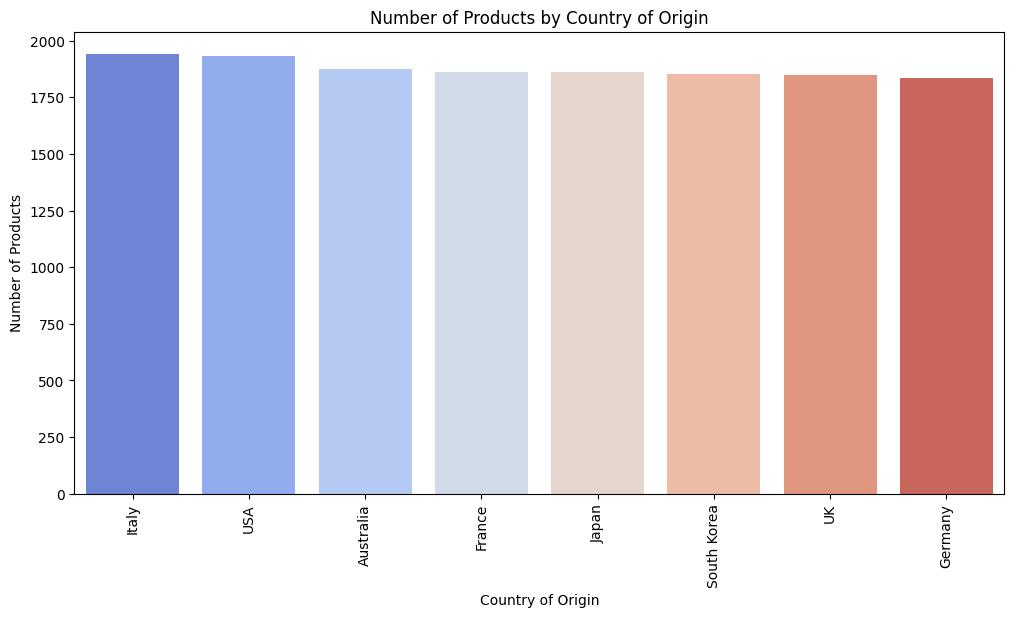

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country_of_Origin', data=df, order=df['Country_of_Origin'].value_counts().index[:10], palette='coolwarm')
plt.title('Number of Products by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()